In [1]:
import visa
import time
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
'''Open connection to noise figure meter & begin remote control'''
rm = visa.ResourceManager()
#rm.list_resources()
nfm = rm.open_resource('GPIB0::8::INSTR', read_termination = '\r\n') #in manual as carriage return 
nfm.write('R6')
        

(4, <StatusCode.success: 0>)

In [7]:
'''Declare Test Variables: all you need to change is here!'''

## The default range is 10 - 1590 MHz in steps of 20 MHz. If you want to change this, change 
## default_fRange to False and change the start, stop, and step frequency values. Note: in measurement mode 1,
## the maximum frequency is 1600 MHz.

default_fRange = True

fstart = 10 #starting freq in MHz
fstop = 20 #end freq in MHz
fstep = 1 #step size in MHz

#change these variables to the path where you want your file saved and its name
path = '/home/radio/data/noiseFigureMeter/'
filename = 'test.txt'


In [8]:
#set up the test

#configure NF meter
nfm.write('H1') #set to output freq, insertion gain, and the noise figure
nfm.write('N0') #set the units of the noise figure to dB

if default_fRange == True:
    fstart = 10 #starting freq in MHz
    fstop = 1590 #end freq in MHz
    fstep = 10 #step size in MHz

#nfm.write('M1') #sets it to uncorrected noise figure 
#nfm.write('M2') #sets it to corrected noise figure (should be done automatically after calibration)


In [9]:
file = open(path + filename, 'w')

file.write('Frequency (Hz),Insertion Gain (dB),Noise Figure (dB)\n')
print('Starting Sweep:')
for f in np.arange(fstart,fstop+fstep,fstep):
    print('On frequency:'+str(f) + ' MHz',end='\r',flush=True)
    d = nfm.query('FR '+str(f)+'en') #goes to frequency
    #print(type(d))
    time.sleep(.5) #delay half a second
    ##print(d +'\n')##
    file.write(d+'\n') #write the data to file
    
file.close()
print('\n'+'Sweep Completed')

Starting Sweep:
On frequency:1590 MHz
Sweep Completed


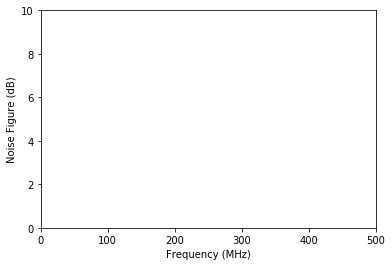

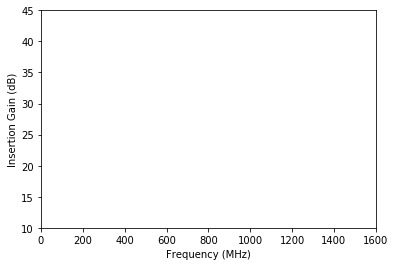

In [10]:
"""Plot the data"""
df = pd.read_csv(path+filename, sep = ',')

f = df['Frequency (Hz)'] 
IG = df['Insertion Gain (dB)'] 
F = df['Noise Figure (dB)'] 
plt.plot(f*10**-6,F,'.')
#plt.ylim(min(F) - .25*max(F),max(F)+ .25*max(F))
plt.xlim(0,500)
plt.ylim(0,10)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Noise Figure (dB)')

#plt.xlim(0,1.4e9)
fig1 = plt.figure(2)
plt.plot(f*10**-6,IG,'.')
plt.ylim(min(IG) - .25*max(IG),max(IG)+ .25*max(IG))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Insertion Gain (dB)')
plt.xlim(0,1600)
plt.ylim(10,45)
plt.show()